# El observador, Uruguay 
El crawler se realizó en la sección de noticias nacionales del diario ¨El observador¨.

https://www.elobservador.com.uy/elobservador/nacional

### [1] Crawler

__1.1 URL seed__

In [1]:
SEED_CRAWL = 'https://www.elobservador.com.uy/elobservador/nacional'

__1.2 Class crawler__

In [2]:
QUERY_URL = "//div[@class='notas_seccion']//a/@href"

In [3]:
import random
import requests
from requests_html import HTMLSession
from requests_html import HTML
import os
import json
import validatorsdef start_request(self,url,header=dict()):
        session = HTMLSession()
        header['user-agent'] = random.choice(self.USER_AGENT_LIST)
        response = session.get(url,headers=header)        
        return response

In [13]:
class Crawler:
    
    USER_AGENT_LIST = [
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/22.0.1207.1 Safari/537.1",
        "Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1092.0 Safari/536.6",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1090.0 Safari/536.6",
        "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/19.77.34.5 Safari/537.1",
        "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.9 Safari/536.5",
        "Mozilla/5.0 (Windows NT 6.0) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.36 Safari/536.5",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.0 Safari/536.3",
        "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24",
        "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24"
]

    #ruta XPATH hacia los enlaces que queremos recopilar
    query_extract_all_href=QUERY_URL

    #variable que permite listar todos los enlaces recopilado
    all_json_to_send = []
    
    def _init_(self):
        pass
    
    def start_request(self,url):
        session = HTMLSession()
        header = dict()
        header['user-agent'] = random.choice(self.USER_AGENT_LIST)
        response = session.get(url,headers=header)        
        return response
    
    def parse(self, response):
        url_root = "https://www.elobservador.com.uy"
        self.all_json_to_send = []
        all_extracted_href = response.html.xpath(self.query_extract_all_href)
        for href in all_extracted_href:
            json_to_send= dict()
            json_to_send["url"]= url_root+href
            self.all_json_to_send.append(json_to_send)

__1.3 Crawler__

In [14]:
crawler = Crawler()

response = crawler.start_request(SEED_CRAWL)

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" xml:lang="es" lang="es" xmlns:fb="http://www.facebook.com/2008/fbml" itemid="https://www.elobservador.com.uy/elobservador/nacional" itemtype="http://schema.org/WebSite" itemscope xmlns:og="http://opengraphprotocol.org/schema/"><head prefix="og: http://ogp.me/ns#"><script>function get_cookies() {\n    \tcookies = {};\n    \tif (typeof document.cookie != \'undefined\' && document.cookie.length > 0)\n    \t\tdocument.cookie.split(\';\').forEach(function (cookie) {\n    \t\t\tvar parts = cookie.match(/(.*?)=(.*)$/)\n    \t\t\tcookies[parts[1].trim()] = (parts[2] || \'\').trim();\n    \t\t})\n    \treturn cookies;\n    }\n    \n    if (location && location.href && location.href.indexOf("app=true") != -1) {\n    \twindow.addEventListener(\'beforeinstallprompt\', function (e) {\n    \t\tconsole.log("beforeinstallprompt !!!!");\n    \t\te.preventDefault();\n    \t});\n    }\n    \n    function loadScript(url, callback) {\n        var s
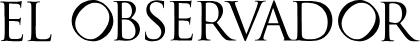

In [15]:
response.html.html

In [16]:
crawler.parse(response)

In [17]:
crawler.all_json_to_send

[{'url': 'https://www.elobservador.com.uy/nota/renunciaron-diez-integrantes-de-la-comision-nacional-de-etica-en-la-investigacion--2020106203017'},
 {'url': 'https://www.elobservador.com.uy/nota/renunciaron-diez-integrantes-de-la-comision-nacional-de-etica-en-la-investigacion--2020106203017'},
 {'url': 'https://www.elobservador.com.uy/nota/renunciaron-diez-integrantes-de-la-comision-nacional-de-etica-en-la-investigacion--2020106203017'},
 {'url': 'https://www.elobservador.com.uy/nota/lacalle-pou-llamo-a-instructor-de-investigacion-sobre-toma-para-respaldarlo-202010620714'},
 {'url': 'https://www.elobservador.com.uy/nota/lacalle-pou-llamo-a-instructor-de-investigacion-sobre-toma-para-respaldarlo-202010620714'},
 {'url': 'https://www.elobservador.com.uy/nota/lacalle-pou-llamo-a-instructor-de-investigacion-sobre-toma-para-respaldarlo-202010620714'},
 {'url': 'https://www.elobservador.com.uy/nota/hay-un-nuevo-fallecido-por-coronavirus-y-23-contagios-2020106194619'},
 {'url': 'https://www.el

__1.4 Testing__

In [18]:
#el crawler debe devolver una lista no vacia
assert(len(crawler.all_json_to_send)>0) 

In [19]:
#lo que devuelve el crawler deben ser URLs correctas
assert validators.url(crawler.all_json_to_send[0]["url"])

### [2] Scraping

__2.1 URL seed__

In [85]:
SEED_SCRAP = 'https://www.elobservador.com.uy/nota/lacalle-pou-llamo-a-instructor-de-investigacion-sobre-toma-para-respaldarlo-202010620714'

__2.2 Class Scraper__

In [86]:
QUERY_TITLE = "//h1[@itemprop='headline']"
QUERY_CONTENT =  "//div[@itemprop='articleBody']//p"
QUERY_DATE = "//meta[@itemprop='datePublished']//@content"

In [87]:
import json
import w3lib.html
import random
import os
import datetime
import requests
import string
import calendar
import html
import locale 
from requests_html import HTMLSession

In [88]:
class Scraper:
    
    USER_AGENT_LIST = [
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/22.0.1207.1 Safari/537.1",
        "Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1092.0 Safari/536.6",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1090.0 Safari/536.6",
        "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/19.77.34.5 Safari/537.1",
        "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.9 Safari/536.5",
        "Mozilla/5.0 (Windows NT 6.0) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.36 Safari/536.5",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.0 Safari/536.3",
        "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24",
        "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24"
    ]

    query_extract_title = QUERY_TITLE
    query_extract_text =  QUERY_CONTENT
    query_extract_date = QUERY_DATE

    def _init_(self):
        pass

    #no cambiar    
    def start_request(self,url):
        headers = {'user-agent':random.choice(self.USER_AGENT_LIST) }
        session = HTMLSession()
        response = session.get(url,headers=headers)        
        return response
    
    #no cambiar
    def clean_text(self, html_text):
        text_without_tags = w3lib.html.remove_tags(html_text)
        text_without_escape_chars = w3lib.html.replace_escape_chars(text_without_tags)
        text_without_escape_chars = html.unescape(text_without_escape_chars)
        text_without_whitespace = text_without_escape_chars.strip()
        return text_without_whitespace

    #se puede cambiar
    def format_date(self,date):
        return(date.split("T")[0])
    
    #se puede cambiar
    def parse(self, response):
        self.news_text = []
        self.message_to_send = []
        self.scraped_url = response.url
        self.news_title = response.html.xpath(self.query_extract_title)[0].text
        self.date = response.html.xpath(self.query_extract_date)[0]

        self.news_title = self.clean_text(self.news_title)
        self.date = self.clean_text(self.date)
        self.date = self.format_date(self.date)
        
        news_text_extracted_response = response.html.xpath(self.query_extract_text)
        for part_of_body in news_text_extracted_response:
            stripped_html_tags = w3lib.html.remove_tags(part_of_body.text)
            text_cleaned = self.clean_text(stripped_html_tags)
            self.news_text.append(text_cleaned)  

__2.3 Scraping__

In [89]:
scraper = Scraper()
response =scraper.start_request(SEED_SCRAP)

In [90]:
scraper.parse(response)

In [91]:
scraper.news_title

'Lacalle Pou llamó a instructor de investigación sobre Toma para respaldarlo'

In [92]:
scraper.news_text

['El presidente Luis Lacalle Pou respaldó al subdirector de la Oficina Nacional del Servicio Civil (ONSC), Ariel Sánchez, en su rol de instructor de la investigación administrativa contra el exsecretario de Presidencia, Miguel Ángel Toma, por los viajes a Roma y Washington con una contadora del gobierno.',
 'Lacalle Pou se comunicó por teléfono con Sánchez para ratificarle la confianza luego de que el semanario Búsqueda diera a conocer un antiguo vínculo que mantuvo con Toma en 2009, durante la primera administración de Tabaré Vázquez.',
 'Según publicó Búsqueda, Sánchez –que compartió trabajo con Toma en la ONSC desde 2005 al 2008– pidió al entonces secretario de Presidencia que asegurara condiciones de reclusión seguras para su hijo,\xa0procesado por riñas.',
 'Según comentó Lacalle Pou a la prensa este martes y consignó Telemundo, Presidencia estaba informada de ese vínculo y Sánchez tiene "respaldo absoluto" para continuar la investigación.',
 'Leé también',
 'Toma declaró ante la 

In [78]:
scraper.date

'2020-10-06'

__4.- Testeo__

In [93]:
# Una función que verifica que las fechas tienen el formato correcto YYYY-MM-DD
def validate(date_text):
    try:
        datetime.datetime.strptime(date_text, "%Y-%m-%d")
        return True
    except:
        print("La fecha no tiene el formato correcto, año-mes-dia")
        return False

In [94]:
#Verificamos que el scraper devuelve algo y que las fechas tienen un formato correcto
assert(len(scraper.news_title)>0)
assert(len(scraper.news_text)>0)
assert(validate(scraper.date))